In [ ]:
pip install responsibly

In [ ]:
import responsibly
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np 
import sklearn
import seaborn as sns
from pathlib import Path
import os
import sys
import csv
import nltk                                                             
from nltk.stem import SnowballStemmer                                   
from nltk import word_tokenize                                          
from nltk.corpus import stopwords  
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
os.chdir('/content/drive/MyDrive/text_mining_termpaper')
df = pd.read_csv('corpus_children.csv')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
remove_pronouns=['he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself']
stopwords = [word for word in remove_pronouns if word not in stopwords]

In [ ]:
import string 
import re
#1) Preprocess
### Cleaning Function 
def cleaning(text):
    # Remove Punctuation 
    clean_text=text.translate(str.maketrans('', '', string.punctuation))
    # Remove Symbols 
    clean_text=re.sub(r'[^\w]', ' ', clean_text)
    # Remove Numbers
    #clean_text=clean_text.translate(str.maketrans('', '', string.digits))
    # Put in Lowercase 
    #clean_text=clean_text.lower()
    # Remove StopWords
    var=clean_text.split()
    filtered_list=[]
    for word in var:
        if word not in stopwords:
            filtered_list.append(word)
    clean_text=" ".join(map(str, filtered_list))
    return clean_text


#def stemming(text):
 #   stemming_output = ' '.join([englishStemmer.stem(w) for w in text.split()])
  #return stemming_output 

#load stopwords
df['clean_text']=[cleaning(i) for i in df['text']]

In [ ]:
df['clean_text'][1]

'THE HUNTING OF THE SNARK an Agony in Eight Fits by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 12 Inscribed to a dear Child in memory of golden summer hours and whispers of a summer sea Girt with a boyish garb for boyish task Eager she wields her spade yet loves as well Rest on a friendly knee intent to ask The tale he loves to tell Rude spirits of the seething outer strife Unmeet to read her pure and simple spright Deem if you list such hours a waste of life Empty of all delight Chat on sweet Maid and rescue from annoy Hearts that by wiser talk are unbeguiled Ah happy he who owns that tenderest joy The heartlove of a child Away fond thoughts and vex my soul no more Work claims my wakeful nights my busy days Albeit bright memories of that sunlit shore Yet haunt my dreaming gaze Contents PREFACE Fit the First THE LANDING Fit the Second THE BELLMANS SPEECH Fit the Third THE BAKERS TALE Fit the fourth THE HUNTING Fit the Fifth THE BEAVERS LESSON Fit the Sixth THE BARRISTERS DREAM Fit th

In [ ]:
df["book_text2"]=[re.sub(r'[A-Z]+(?![a-z])', '', x) for x in df["clean_text"]]
df["book_text2"] =[re.sub('[0-9]+', '', x) for x in df['book_text2']]
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

df['text_tokenized']= df['book_text2'].apply(lambda x: tokenization(x))

for i in range(len(df)):
    df["text_tokenized"][i]=list(filter(None, df["text_tokenized"][i]))
    df["text_tokenized"][i]=[x.lower() for x in df["text_tokenized"][i]]
    
## lemmatize
wnl = nltk.stem.WordNetLemmatizer()

def lemmatize(s):

    s = [wnl.lemmatize(word) for word in s]
    return s

df = df.assign(text_lemma = df.text_tokenized.apply(lambda x: lemmatize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Turning to WEAT

In [ ]:
import gensim
## initiate simple word to vec model on our corpus //
model_1 = gensim.models.Word2Vec(df['text_lemma'], min_count=10, size = 300) 
# in order to make it work we would have to have same dimensions as pretrained models 
# model_2 = gensim.models.Word2Vec(df['text_lemma'], min_count = 10, size = 100)

In [ ]:
# from the outputs below it seems like there are still numbers as tokens 

print(len(list(filter(lambda x: re.search('[0-9]+', x), model_1.wv.vocab))))
# 734 words in it that are just numbers 
print(len(model_1.wv.vocab))

0
42624


In [122]:
model_1.wv.most_similar(positive = ['girl','fun'], negative = ['boy'], topn = 11)

[('picnic', 0.4599933624267578),
 ('lovely', 0.4369288384914398),
 ('nan', 0.4367901086807251),
 ('frolic', 0.43126538395881653),
 ('patty', 0.4189818501472473),
 ('pleasure', 0.41786789894104004),
 ('alice', 0.41560155153274536),
 ('delight', 0.38964784145355225),
 ('dolly', 0.3824576735496521),
 ('marjorie', 0.3791784346103668),
 ('doll', 0.3783453106880188)]

In [ ]:
model_1.wv.most_similar(positive=['woman'], negative = ['man'], topn=30)

[('maid', 0.3941485285758972),
 ('grownup', 0.3785022795200348),
 ('prettiest', 0.3630777895450592),
 ('sobbed', 0.3578227162361145),
 ('chick', 0.3466253876686096),
 ('grandchild', 0.34631219506263733),
 ('godmother', 0.339810848236084),
 ('patchwork', 0.33530300855636597),
 ('pined', 0.3348233997821808),
 ('sweetest', 0.33475029468536377),
 ('macalister', 0.3285943269729614),
 ('stella', 0.32706218957901),
 ('weeding', 0.3267471194267273),
 ('weeping', 0.3240766227245331),
 ('governess', 0.3216884136199951),
 ('nursery', 0.3193281888961792),
 ('sewing', 0.3184463083744049),
 ('motherly', 0.3164605498313904),
 ('cunliffe', 0.3152874708175659),
 ('child', 0.31439679861068726),
 ('elspeth', 0.3139083981513977),
 ('nurse', 0.31365966796875),
 ('northbury', 0.31362438201904297),
 ('motherless', 0.31191879510879517),
 ('herself', 0.31084150075912476),
 ('blueeyed', 0.31046852469444275),
 ('bebee', 0.30940958857536316),
 ('boudoir', 0.3087642788887024),
 ('spencervale', 0.3083620071411133),

In [ ]:
fem_dic ={"name": "female words",
          "words":['woman', 'she', 'her', 'herself', 'girl', 
                         'hers', 'female', 'wife']}
male_dic={"name": "male words", 
          "words":['man', 'he', 'him', 'himself', 'boy','his', 
              'male', 'husband']}

paper_fem = {'name': "Paper Female Words",
           "words": ["female", "woman", "girl", "sister", "she", "her", "hers", 
                     "daughter", "mother", "aunt", "grandmother"]}

paper_male = {'name': "Paper Male Words",
              "words": ["male", "man", "boy", "brother", "he", "him", "his", "son", "father", "uncle", "grandfather"]}

strong_dic = {"name": "strong words",
              "words": ['power', 'strong', 'confident', 'dominant', 'potent',
                                'command', 'assert', 'loud', 'bold', 'succeed',
                                'triumph', 'leader', 'shout', 'winner']}
weak_dic = {"name": "weak words",
            "words": ['weak', 'surrender', 'timid', 'vulnerable', 'weakness', 
                           'wispy', 'withdraw', 'yield', 'failure', 'shy',
                            'follow', 'lose', 'fragile', 'afraid', 'loser']}

intelligence = {"name": "intelligence words", 
                "words": ['precocious', 'resourceful', 'inquisitive', 'genius', 'inventive', 'astute', 'adaptable', 'reflective',
                          'discerning', 'intuitive', 'inquiring', 'judicious', 'analytical', 'apt', 'venerable', 'imaginative',
                          'shrewd', 'thoughtful', 'wise', 'smart', 'ingenious', 'clever', 'brilliant', 'logical', 'intelligent']}

appearance = {"name": "appearance words",
              "words": ['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual', 'gorgeous', 'slim', 'bald',
                        'athletic', 'fashionable', 'stout', 'ugly', 'muscular', 'slender', 'feeble', 'handsome', 'healthy',
                        'attractive', 'fat', 'weak', 'thin', 'pretty', 'beautiful', 'strong']}

math = {'name': 'Math words',
        'words': ['math', 'algebra', 'geometry', 'calculus', 'equations', 'computation', 'numbers', 'addition']}

art = {'name': 'Art words', 
       'words': ['poetry', 'art', 'dance', 'literature', 'novel', 'symphony', 'drama', 'sculpture']}


free = {'name': 'Free words',
        'words':['choose', 'will', 'ability', 'opportunity']}

unfree = {'name': 'Unfree words',
          'words': ['responsible', 'must', 'trapped', 'limit']}


feelings = {'name':  'Feelings',
            'words':  ['worry', 'hurt', 'surprise', 'upset', 'tired', 'excited', 'sad', 'happy', 'delighted', 'afraid']}

actions = {'name': 'Action words', 
           'words': ['run', 'jump', 'speak', 'climb', 'hunt', 'break', 'pull', 'shut', 'open', 'lift', 'power']}

# physical vs emotional 

for i in [fem_dic, male_dic, paper_male, paper_fem, strong_dic, weak_dic, intelligence, appearance]:
  i['words'] = [w for w in i['words'] if w in model_1.wv.vocab]
  print(len(i['words']))

8
8
11
11
14
14
24
25


In [85]:
'bjorn' in model_1.wv.vocab

False

Thats a bit annoying that the appearance vector is one longer than the intelligence so we would have to drop one 

In [ ]:
appearance['words'].remove('bald') # don't like that one anyways

### Including Character names

In [ ]:
with open('male_character_names.txt') as f:
    male_names = [line.rstrip('\n') for line in f]

with open('female_character_names.txt') as f:
    female_names = [line.rstrip('\n') for line in f]

female_names = [w for w in female_names if w in model_1.wv.vocab]
male_names = [w for w in male_names if w in model_1.wv.vocab]
print(len(male_names))
print(len(female_names))

1450
891


In [ ]:
import random
# unfortunately we had to kill a few random boys
def checker():
  while len(male_names) > len(female_names):
    male_names.remove(random.choice(male_names))
checker()

In [ ]:
fem_charac_dic ={"name": "female words",
          "words":female_names}
male_charac_dic={"name": "male words", 
          "words":male_names}

In [ ]:
from responsibly.we.weat import calc_single_weat
result_300 = calc_single_weat(model_1.wv, fem_dic, male_dic, strong_dic, weak_dic, with_pvalue =False) 

In [ ]:
def get_weat(list_of_models, attribute_1, attribute_2, list_of_target_1, list_of_target_2, p = False):
  output_list = []
  for model in list_of_models:
    for counter, item in enumerate(list_of_target_1):
      result = calc_single_weat(model['model'].wv, attribute_1, attribute_2, list_of_target_1[counter], list_of_target_2[counter], with_pvalue=p)
      # pvalue can blow up computations
      result['name'] = model['name']
      output_list.append(result)
  df = pd.DataFrame(output_list)
  return(df)


In [ ]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# problematic is that we might have different dimensions 
#  that might be problematic for comparing WEAT scores ? 
word_2_vec = gensim.downloader.load('word2vec-google-news-300')
#glove_twitter100 = gensim.downloade.load('glove-twitter-100')
resultw2v = calc_single_weat(word_2_vec.wv, fem_dic, male_dic, strong_dic, weak_dic, with_pvalue =False) 
#result_glove = calc_single_weat(glove_twitter100.wv, fem_dic, male_dic, strong_dic, weak_dic, with_pvalue =False)

[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [ ]:
models = [{'name': "W2v Children", "model": model_1}, 
          {'name': "W2v Google News", "model": word_2_vec}]

target_1 = [strong_dic, intelligence]
target_2 = [weak_dic, appearance]
df_1 = get_weat(models, paper_fem, paper_male, target_1, target_2, p = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [ ]:
df_1

,Target words,Attrib. words,s,d,p,Nt,Na,name
0,Paper Female Words vs. Paper Male Words,strong words vs. weak words,-0.591275,-1.201847,0.997956,11x2,14x2,W2v Children
1,Paper Female Words vs. Paper Male Words,intelligence words vs. appearance words,-0.543184,-1.435315,0.999860,11x2,24x2,W2v Children
2,Paper Female Words vs. Paper Male Words,strong words vs. weak words,-0.318117,-1.270434,0.999195,11x2,14x2,W2v Google News
3,Paper Female Words vs. Paper Male Words,intelligence words vs. appearance words,-0.699952,-1.510997,0.999908,11x2,24x2,W2v Google News


In [ ]:
# for character names:
models = [{'name': "W2v Children", "model": model_1}]
target_1 = [strong_dic, intelligence]
target_2 = [weak_dic, appearance]
df_2 = get_weat(models, fem_charac_dic, male_charac_dic, target_1, target_2)
df_2

,Target words,Attrib. words,s,d,p,Nt,Na,name
0,female words vs. male words,strong words vs. weak words,-19.736778,-0.570426,None,891x2,14x2,W2v Children
1,female words vs. male words,intelligence words vs. appearance words,-35.916262,-0.571680,None,891x2,24x2,W2v Children


### Improvements: 

Add more models -> 

but be aware of RAM limits -> we cannot load too many databases 

### Visuals:

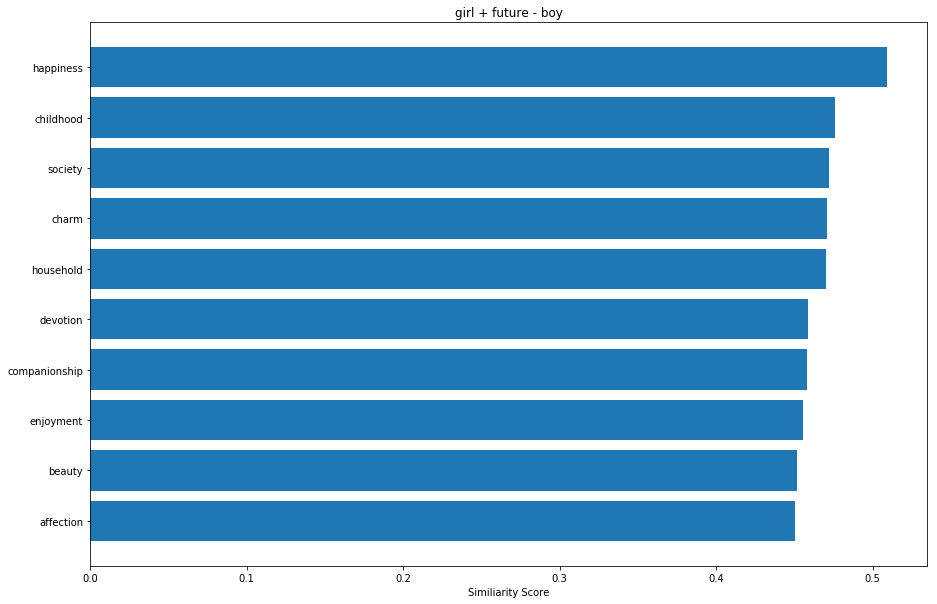

In [ ]:
import matplotlib.pyplot as plt
def plot_sim(model, positive_list, negative_list, title):
  bar = model.wv.most_similar(positive = positive_list, negative = negative_list, topn = 10)
  people = list(zip(*bar))[0][::-1]
  score = list(zip(*bar))[1][::-1]
  x_pos = np.arange(len(people)) 
  fig = plt.figure(figsize=(15, 10))
  plt.barh(x_pos,width = score, align='center')
  plt.yticks(x_pos, people) 
  plt.xlabel('Similiarity Score')
  plt.title(title)
  plt.show()
  return fig

fig_1 = plot_sim(model_1, ['girl', 'future'], ['boy'], 'girl + future - boy')

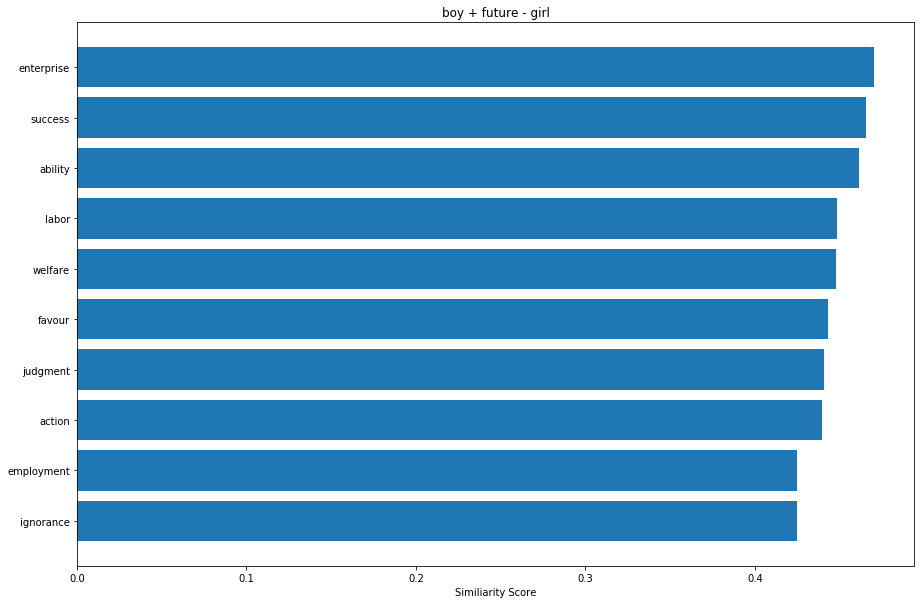

In [ ]:
fig_2 = plot_sim(model_1, ['boy', 'future'], ['girl'], 'boy + future - girl')

In [ ]:
from google.colab import files
fig_1.savefig('example1.pdf', 
           dpi=300, bbox_inches='tight')
fig_2.savefig('example2.pdf', dpi = 300, bbox_inches = 'tight')
files.download("example1.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('example2.pdf') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_1.wv.most_similar(fem_dic['words'])

[('nurse', 0.7033370137214661),
 ('matron', 0.6511642336845398),
 ('maid', 0.6470834016799927),
 ('widow', 0.6240327954292297),
 ('lady', 0.6236170530319214),
 ('child', 0.6215037107467651),
 ('elsie', 0.6110672354698181),
 ('rebecca', 0.5930606126785278),
 ('princess', 0.5925793051719666),
 ('maiden', 0.5925127267837524)]

What else could be visualized?